<a href="https://colab.research.google.com/github/RtemShcherbak/Homeworks/blob/main/%D0%94%D0%97%E2%84%961_%D0%A9%D0%B5%D1%80%D0%B1%D0%B0%D0%BA_%D0%90_%D0%94_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1.Загрузка данных

## 1.1 Установка ключа и скачивание данных

In [ ]:
! pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
! mkdir ~/.kaggle.json

mkdir: cannot create directory ‘/root/.kaggle.json’: File exists


In [ ]:
! cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:

! kaggle datasets download rashikrahmanpritom/heart-attack-analysis-prediction-dataset -f heart.csv

  0% 0.00/11.1k [00:00<?, ?B/s]
100% 11.1k/11.1k [00:00<00:00, 7.72MB/s]


## 1.2 Библиотеки

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Metrics
from sklearn.metrics import classification_report

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier


# Train Test Split
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

# Scaling
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler

##1.3 Загрузка датасета в pandas dataframe

In [ ]:
init_data = pd.read_csv('/content/heart.csv')

# 2.Первичная проверка данных

  Для проверки корректности загрузки посмотрим на первые 10 и последние 10 значений

In [ ]:
init_data.head(10)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [ ]:
init_data.tail(10)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
293,67,1,2,152,212,0,0,150,0,0.8,1,0,3,0
294,44,1,0,120,169,0,1,144,1,2.8,0,0,1,0
295,63,1,0,140,187,0,0,144,1,4.0,2,2,3,0
296,63,0,0,124,197,0,1,136,1,0.0,1,0,2,0
297,59,1,0,164,176,1,0,90,0,1.0,1,2,1,0
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


Скопируем данные для удобства работы, чтобы производить дальнейшую работу по очистке и кодированию с копией, без перезагрузки ключа

In [ ]:
data = init_data.copy(deep = True)

data.rename(
    columns={"cp": "chest_pain",
             "trtbps": "blood_pressure",
             "chol": "cholestoral",
             "fbs": "fasting_blood_sugar",
             "thalachh": "max_heart_rate",
             "exng": "angina",
             "caa": "n_vessels",
             "output": "target",
             "restecg": "rest_ecg"},
          inplace=True)


In [ ]:
data.shape

(303, 14)

Прозведём проверку на пропуски в данных

In [ ]:
data.isnull().sum()

age                    0
sex                    0
chest_pain             0
blood_pressure         0
cholestoral            0
fasting_blood_sugar    0
rest_ecg               0
max_heart_rate         0
angina                 0
oldpeak                0
slp                    0
n_vessels              0
thall                  0
target                 0
dtype: int64

<Axes: >

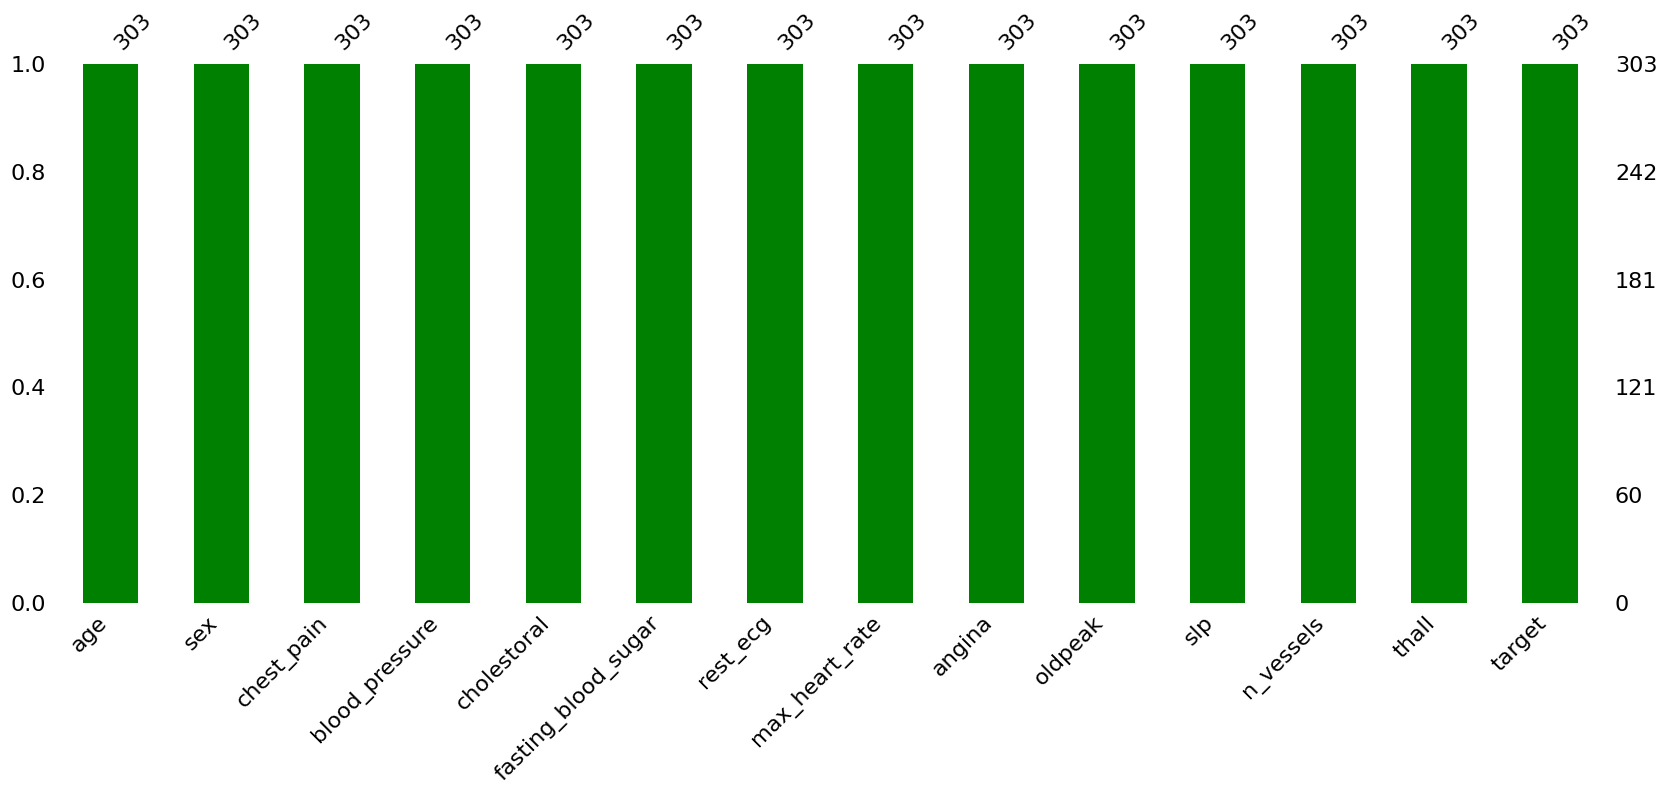

In [ ]:
import missingno as ms
ms.bar(data, color='g', figsize=(20, 7))

Судя по всему, пропусков нет. Теперь проведём проверку на дубликаты и дропнем их, если они есть

In [ ]:
data.duplicated().sum()

1

In [ ]:
data.drop_duplicates(inplace=True)
data.dropna(inplace=True)

In [ ]:
data.shape

(302, 14)

Далее произведём замену типов данных, для более экономного использования памяти. Из описания данных следует, что точности данных int64 и float64 избыточны. В колонке 'oldpeak', например, не бывает больше одного знака после запятой

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 302 entries, 0 to 302
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  302 non-null    int64  
 1   sex                  302 non-null    int64  
 2   chest_pain           302 non-null    int64  
 3   blood_pressure       302 non-null    int64  
 4   cholestoral          302 non-null    int64  
 5   fasting_blood_sugar  302 non-null    int64  
 6   rest_ecg             302 non-null    int64  
 7   max_heart_rate       302 non-null    int64  
 8   angina               302 non-null    int64  
 9   oldpeak              302 non-null    float64
 10  slp                  302 non-null    int64  
 11  n_vessels            302 non-null    int64  
 12  thall                302 non-null    int64  
 13  target               302 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 35.4 KB


In [ ]:
data = pd.concat(
    [data.drop(columns = ['oldpeak', 'target']).astype(np.int16),
     data['oldpeak'].astype(np.float32),
     data['target'].astype(np.int16)],
     axis=1,
     copy=True
     )

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 302 entries, 0 to 302
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  302 non-null    int16  
 1   sex                  302 non-null    int16  
 2   chest_pain           302 non-null    int16  
 3   blood_pressure       302 non-null    int16  
 4   cholestoral          302 non-null    int16  
 5   fasting_blood_sugar  302 non-null    int16  
 6   rest_ecg             302 non-null    int16  
 7   max_heart_rate       302 non-null    int16  
 8   angina               302 non-null    int16  
 9   slp                  302 non-null    int16  
 10  n_vessels            302 non-null    int16  
 11  thall                302 non-null    int16  
 12  oldpeak              302 non-null    float32
 13  target               302 non-null    int16  
dtypes: float32(1), int16(13)
memory usage: 11.2 KB


 # 3.Основное исследование

Теперь посмотрим на данные более подробно

array([[<Axes: title={'center': 'age'}>, <Axes: title={'center': 'sex'}>,
        <Axes: title={'center': 'chest_pain'}>,
        <Axes: title={'center': 'blood_pressure'}>],
       [<Axes: title={'center': 'cholestoral'}>,
        <Axes: title={'center': 'fasting_blood_sugar'}>,
        <Axes: title={'center': 'rest_ecg'}>,
        <Axes: title={'center': 'max_heart_rate'}>],
       [<Axes: title={'center': 'angina'}>,
        <Axes: title={'center': 'slp'}>,
        <Axes: title={'center': 'n_vessels'}>,
        <Axes: title={'center': 'thall'}>],
       [<Axes: title={'center': 'oldpeak'}>,
        <Axes: title={'center': 'target'}>, <Axes: >, <Axes: >]],
      dtype=object)

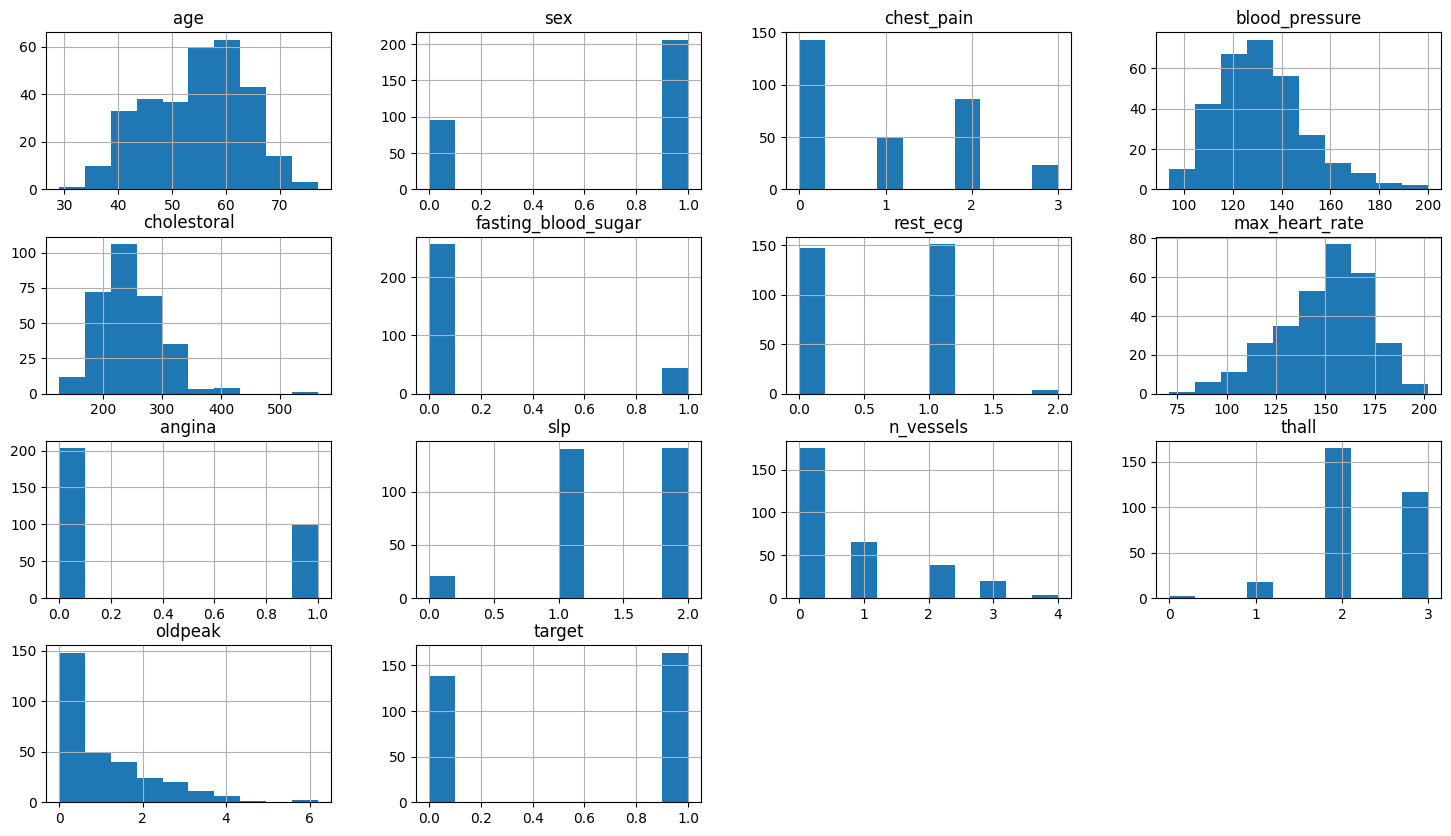

In [ ]:
data.hist(figsize=(18, 10))

Таким образом, числовыми являются признаки 'age', 'blood_pressure', 'cholectorical', 'max_heart_rate' и 'oldpeak'.

In [ ]:
numbers_cols = ['age','blood_pressure','cholestoral','max_heart_rate','oldpeak']
categorical_cols = ['sex','chest_pain','fasting_blood_sugar','rest_ecg','angina','slp','n_vessels','thall','target']

In [ ]:
numbers_cols

['age', 'blood_pressure', 'cholestoral', 'max_heart_rate', 'oldpeak']

In [ ]:
data[numbers_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
age,302.0,54.420530,9.047970,29.0,48.00,55.5,61.00,77.0
blood_pressure,302.0,131.602649,17.563394,94.0,120.00,130.0,140.00,200.0
cholestoral,302.0,246.500000,51.753489,126.0,211.00,240.5,274.75,564.0
max_heart_rate,302.0,149.569536,22.903527,71.0,133.25,152.5,166.00,202.0
oldpeak,302.0,1.043046,1.161452,0.0,0.00,0.8,1.60,6.2


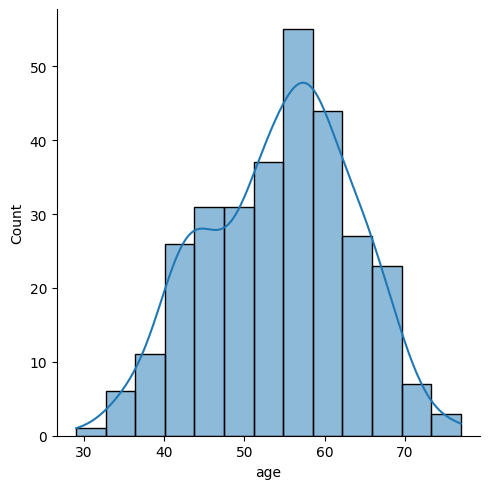

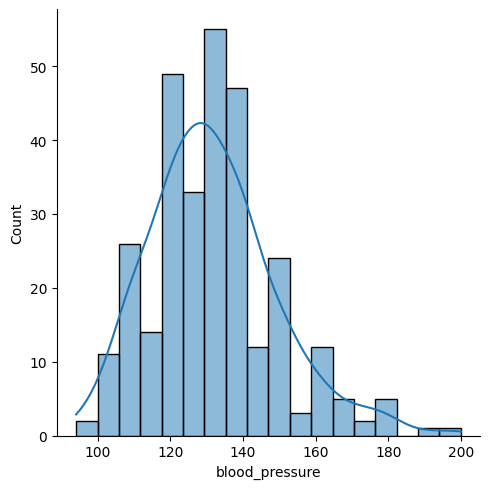

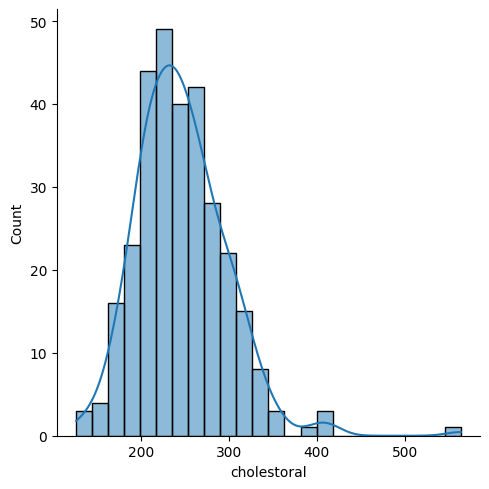

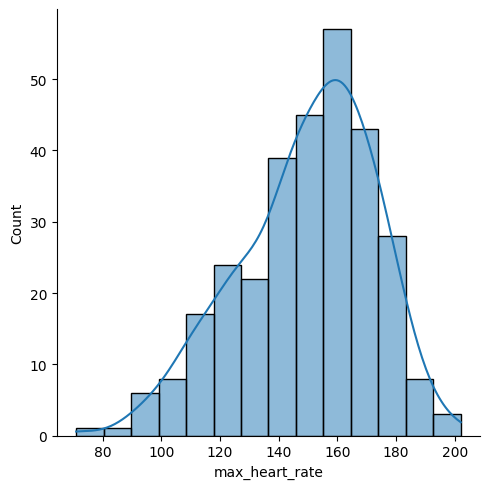

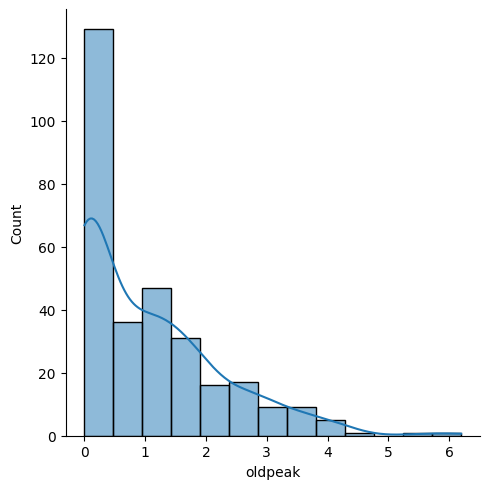

In [ ]:

for feature in numbers_cols:
  sns.displot(x = feature,
            kde = True,
            data = data)

In [ ]:
categorical_cols

['sex',
 'chest_pain',
 'fasting_blood_sugar',
 'rest_ecg',
 'angina',
 'slp',
 'n_vessels',
 'thall',
 'target']

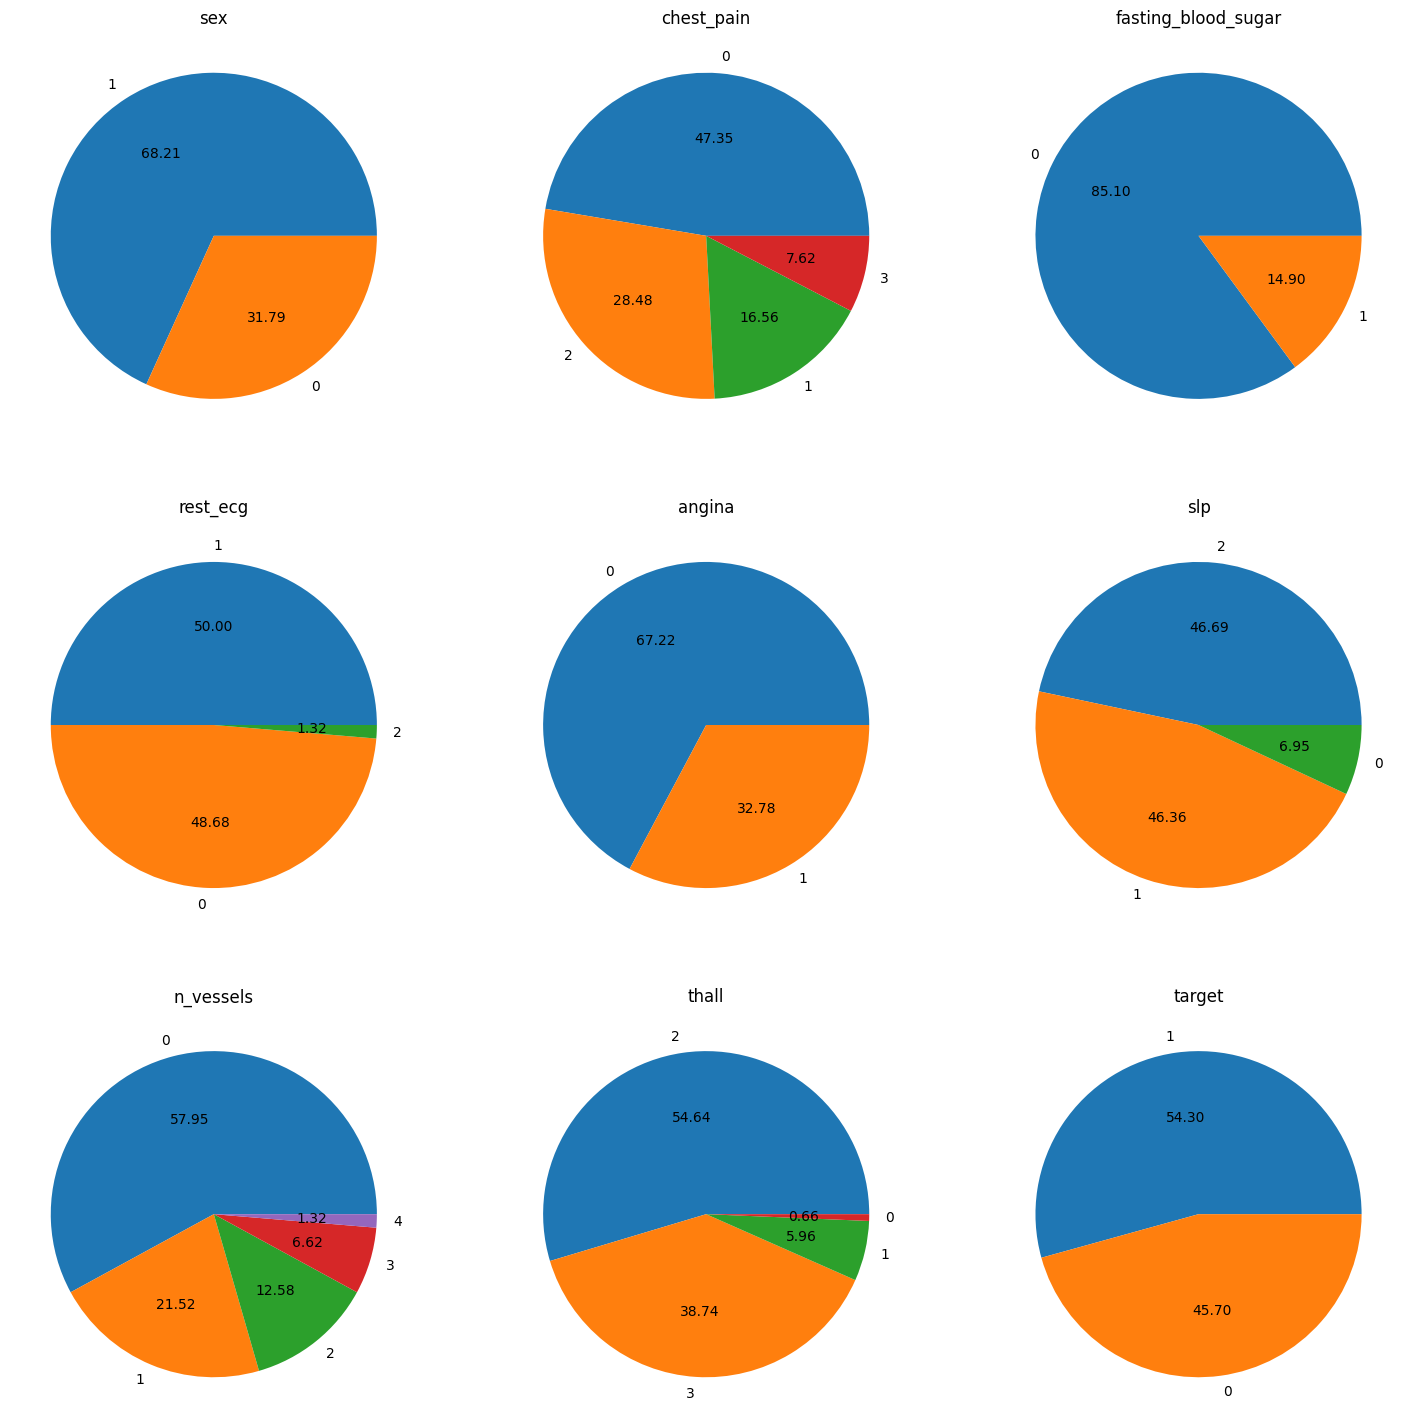

In [ ]:
fig, ax =plt.subplots(3, 3, figsize=(18, 18))

row = 0
col = 0
for i, feature in enumerate(categorical_cols):
  ax[row, col].pie(data[feature].value_counts(),
                   autopct='%.2f',
                   labels=data[feature].value_counts().index)
  ax[row, col].set_title(feature)
  col += 1
  if (i) % 3 == 2:
    row += 1
    col = 0


In [ ]:
data.corr()['target']

age                   -0.221476
sex                   -0.283609
chest_pain             0.432080
blood_pressure        -0.146269
cholestoral           -0.081437
fasting_blood_sugar   -0.026826
rest_ecg               0.134874
max_heart_rate         0.419955
angina                -0.435601
slp                    0.343940
n_vessels             -0.408992
thall                 -0.343101
oldpeak               -0.429146
target                 1.000000
Name: target, dtype: float64

<Axes: >

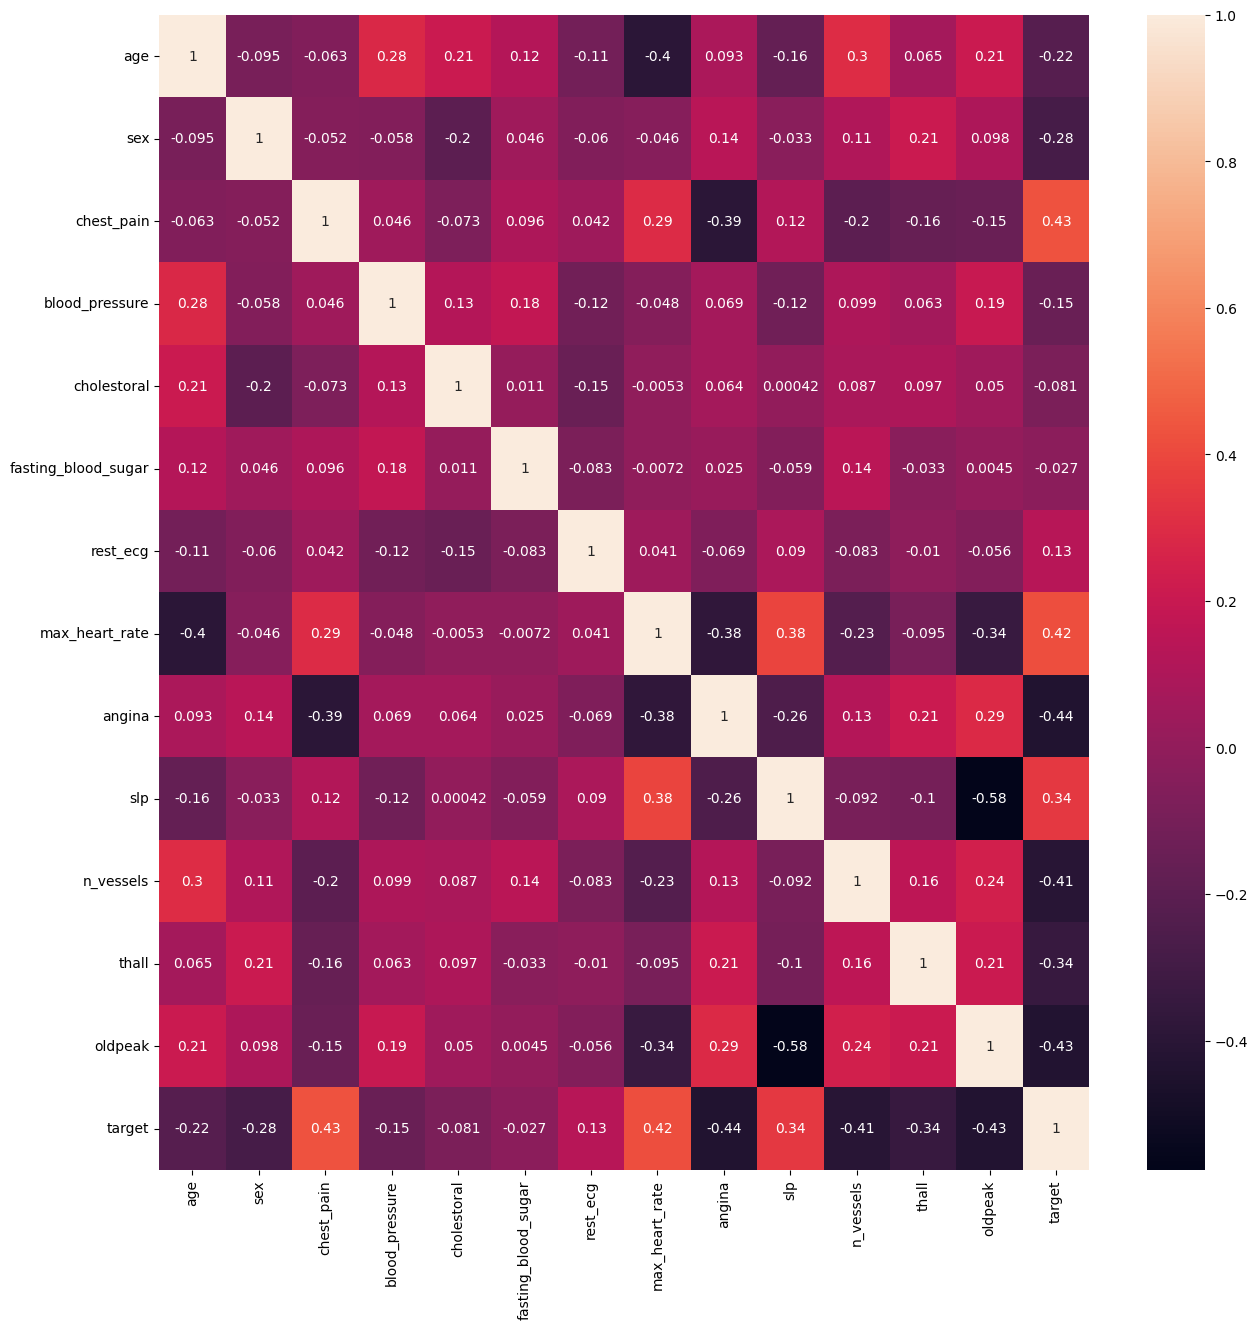

In [ ]:
plt.figure(figsize=(15,15))
sns.heatmap(data.corr(),annot=True)

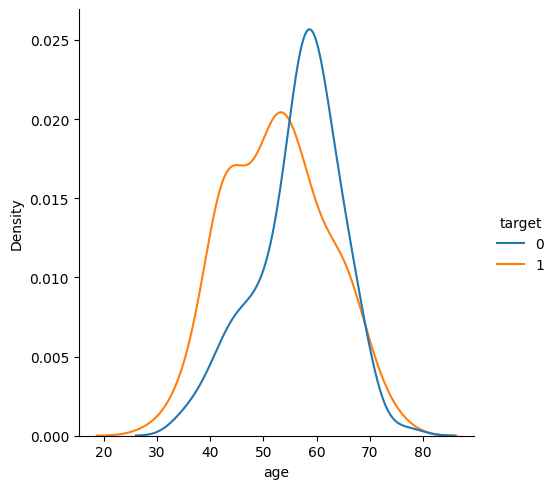

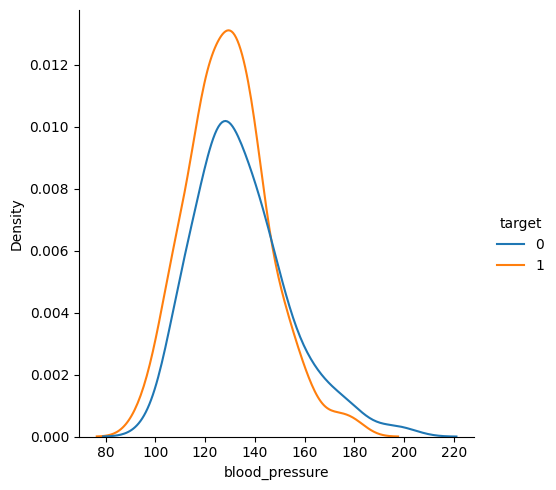

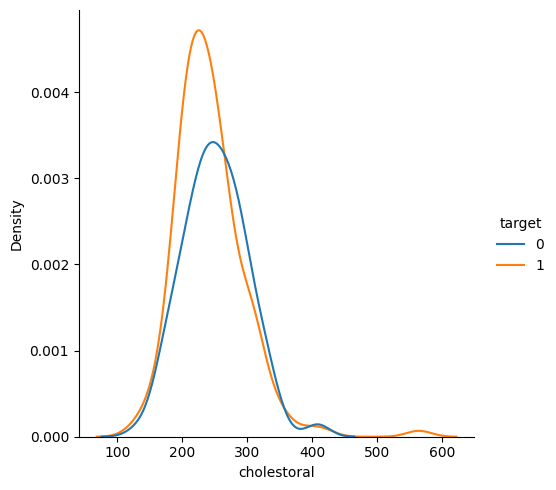

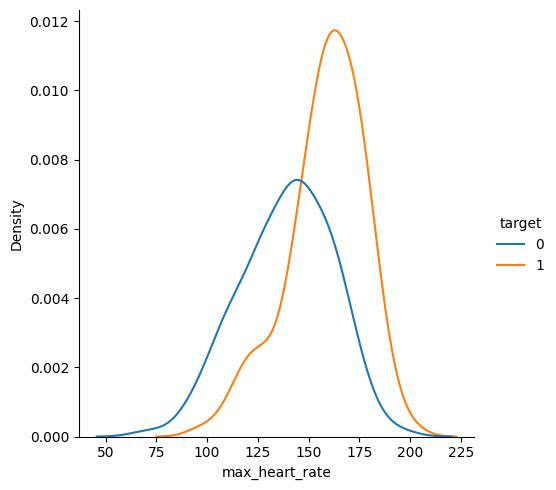

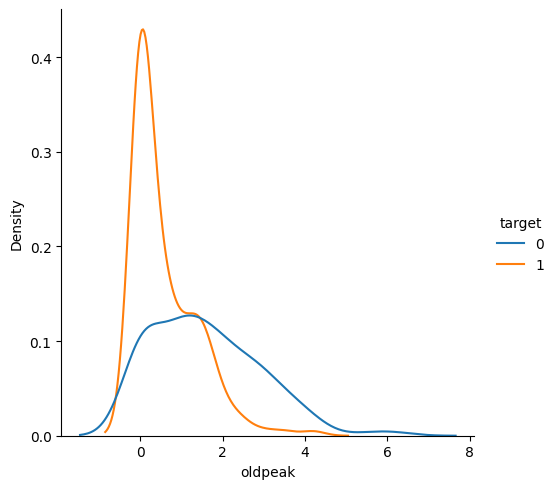

In [ ]:
for col in numbers_cols:
  sns.displot(x = col,
            hue = "target",
            kind = "kde",
            data = data);

<Axes: xlabel='sex', ylabel='count'>

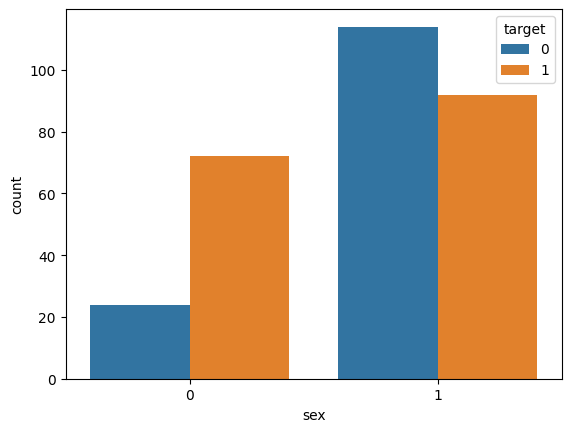

In [ ]:
sns.countplot(x = 'sex', hue = 'target', data = data)

<Axes: xlabel='chest_pain', ylabel='count'>

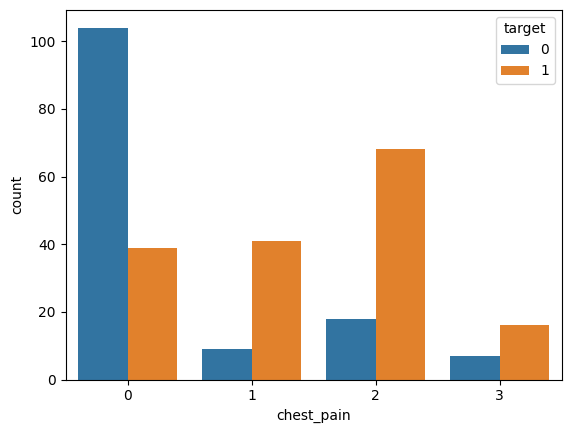

In [ ]:
sns.countplot(x = 'chest_pain', hue = 'target', data = data)

<Axes: xlabel='fasting_blood_sugar', ylabel='count'>

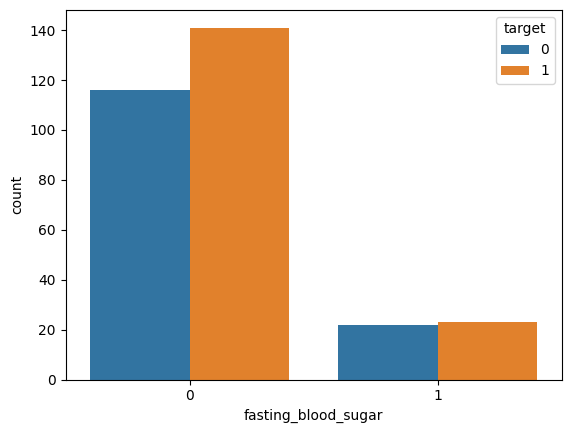

In [ ]:
sns.countplot(x = 'fasting_blood_sugar', hue = 'target', data = data)

<Axes: xlabel='rest_ecg', ylabel='count'>

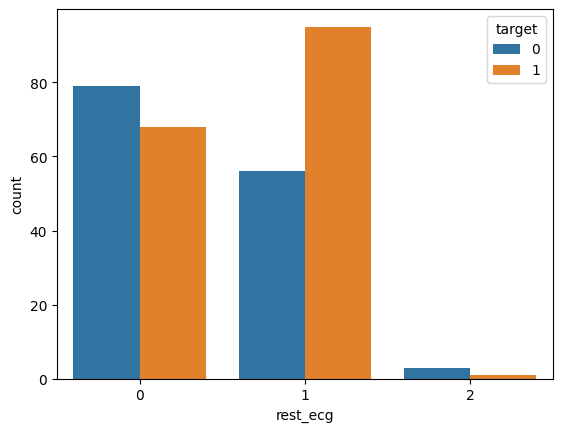

In [ ]:
sns.countplot(x = 'rest_ecg', hue = 'target', data = data)

<Axes: xlabel='angina', ylabel='count'>

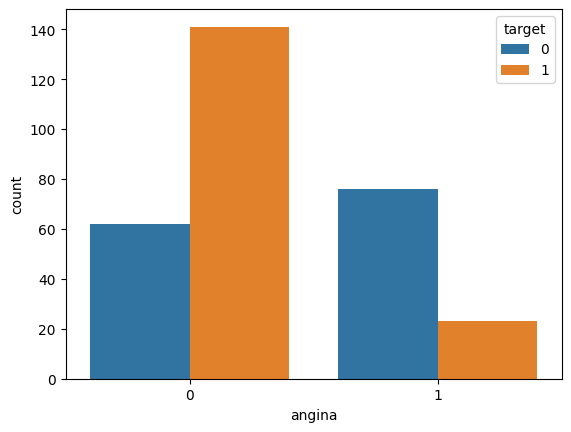

In [ ]:
sns.countplot(x = 'angina', hue = 'target', data = data)

<Axes: xlabel='slp', ylabel='count'>

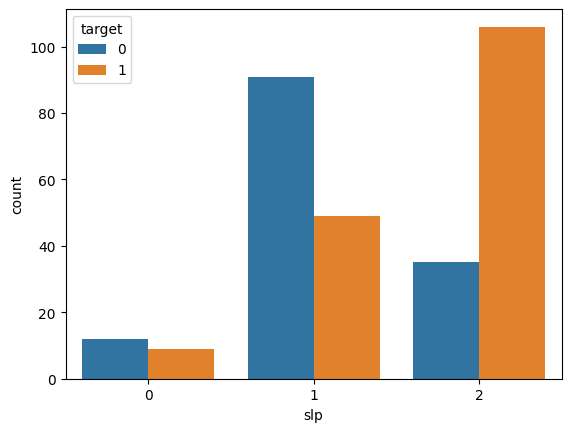

In [ ]:
sns.countplot(x = 'slp', hue = 'target', data = data)

<Axes: xlabel='n_vessels', ylabel='count'>

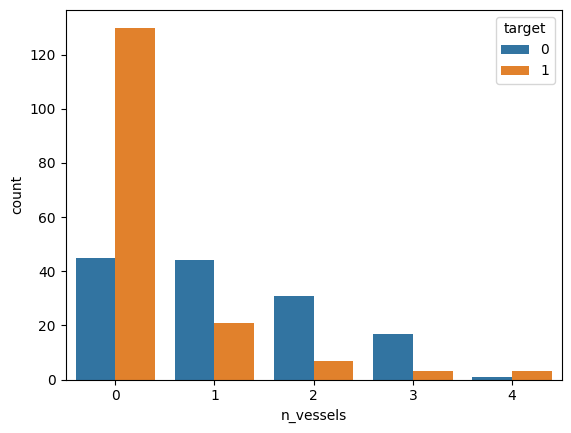

In [ ]:
sns.countplot(x = 'n_vessels', hue = 'target', data = data)

<Axes: xlabel='thall', ylabel='count'>

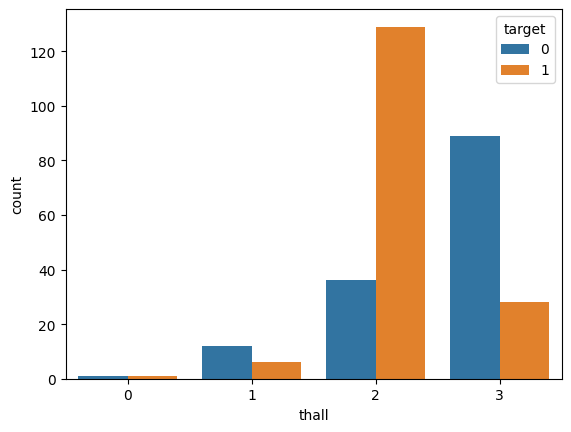

In [ ]:
sns.countplot(x = 'thall', hue = 'target', data = data)

## Вывод
1. В данных не было NaN значений
2. В данных есть выбросы, однако они незначительны (значения не отличаются на порядки) и в силу не полного понимая границ рассматриваемых величин, их решено оставить
3. Присутствует дисбаланс полов
4. Наибольшая корреляция с target'oм наблюдается у признаков max_heart_rate и chest_pain (боли в сердце и учащённое сердцебиение повышают риск инфаркта)
5. Риску инфаркта подвержены не самые старые люди (в районе 55-60 лет)
6. Сравнивая относительные высоты столбцов гистограммы, можно сделать вывод, что у пола 1 риск инфаркта выше
7. Переболевшие ангиной люди имеют меньший риск инфаркта (?)

# 4.Моделирование

## 4.1 KNeighborsClassifire


### 4.1.1 Исходные данные, не применяется one-hot encoder, не применяется масштабирование данных.


In [ ]:
X_train, x_test, Y_train, y_test = train_test_split(data.drop(columns='target'), data['target'], test_size=0.2, random_state=42)

In [ ]:
X_train.merge(Y_train, left_index=True, right_index=True).head(3)

,age,sex,chest_pain,blood_pressure,cholestoral,fasting_blood_sugar,rest_ecg,max_heart_rate,angina,slp,n_vessels,thall,oldpeak,target
132,42,1,1,120,295,0,1,162,0,2,0,2,0.0,1
203,68,1,2,180,274,1,0,150,1,1,0,3,1.6,0
197,67,1,0,125,254,1,1,163,0,1,2,3,0.2,0


In [ ]:
x_test.merge(y_test, left_index=True, right_index=True).head(3)

,age,sex,chest_pain,blood_pressure,cholestoral,fasting_blood_sugar,rest_ecg,max_heart_rate,angina,slp,n_vessels,thall,oldpeak,target
180,55,1,0,132,353,0,1,132,1,1,1,3,1.2,0
229,64,1,2,125,309,0,1,131,1,1,0,3,1.8,0
111,57,1,2,150,126,1,1,173,0,2,1,3,0.2,1


In [ ]:
knn = KNeighborsClassifier()
knn.fit(X_train, Y_train)

KNeighborsClassifier()

In [ ]:
y_pred = knn.predict(x_test)

In [ ]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.67      0.55      0.60        29
           1       0.65      0.75      0.70        32

    accuracy                           0.66        61
   macro avg       0.66      0.65      0.65        61
weighted avg       0.66      0.66      0.65        61



In [ ]:
data['target'].value_counts()

1    164
0    138
Name: target, dtype: int64

#### Вывод:
На сырых данных, без масштабирования, без применения кросс-валидации и кодирования алгоритм KNN даёт результат близкий к случайному.

f1_macro = 0.65

### 4.1.2 Не применяется one-hot encoder, применяется масштабирование всех данных.


In [ ]:
X_train, x_test, Y_train, y_test = train_test_split(data.drop(columns='target'), data['target'], test_size=0.2, random_state=42)

scaler = RobustScaler()
scaler.fit(X_train)
X_train = pd.DataFrame(scaler.transform(X_train), columns=data.drop(columns='target').columns)
x_test = pd.DataFrame(scaler.transform(x_test), columns=data.drop(columns='target').columns)

knn = KNeighborsClassifier()
knn.fit(X_train, Y_train)
y_pred = knn.predict(x_test)
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.90      0.85        29
           1       0.90      0.81      0.85        32

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.86      0.85      0.85        61



####Вывод:
метрики качества улучшились, по отношению к метрикам в предыдущем эксперименте однако значения recall=0.81 и precision=0.90 для 1 класса, означают, что алгоритм точно отделяет один клас от другого, однако полнота не сильно хороша. В данной ситуации - определение риска срдечного приступа - такой вариант неприемлем.

f1_macro = 0.85

### 4.1.3 Применяется one-hot encoder для категориальных данных, применяется масштабирование непрерывных данных.


In [ ]:
numbers_cols = ['age','blood_pressure','cholestoral','max_heart_rate','oldpeak']
categorical_cols = ['sex','chest_pain','fasting_blood_sugar','rest_ecg','angina','slp','n_vessels','thall'] #убрали target

In [ ]:
X_train, x_test, Y_train, y_test = train_test_split(data.drop(columns='target'), data['target'], test_size=0.2, random_state=42)

scaler = RobustScaler()
scaler.fit(X_train[numbers_cols])
numbers_feature_train = pd.DataFrame(scaler.transform(X_train[numbers_cols]),columns = numbers_cols)
numbers_feature_test = pd.DataFrame(scaler.transform(x_test[numbers_cols]), columns = numbers_cols)

ohe = OneHotEncoder(handle_unknown="ignore", sparse=False)
ohe.fit(X_train[categorical_cols])
categorical_features_train = pd.DataFrame(ohe.transform(X_train[categorical_cols]), columns = ohe.get_feature_names_out(categorical_cols))
categorical_features_test = pd.DataFrame(ohe.transform(x_test[categorical_cols]), columns = ohe.get_feature_names_out(categorical_cols))

X_train = pd.concat([categorical_features_train, numbers_feature_train], axis=1)
x_test = pd.concat([categorical_features_test, numbers_feature_test], axis=1)

/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
knn = KNeighborsClassifier()
knn.fit(X_train, Y_train)
y_pred = knn.predict(x_test)
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.90      0.87        29
           1       0.90      0.84      0.87        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61



####Вывод:
использование кодирования данных позволило повысить f1-меру, однако полнота обнаружения 1 класса всё ещё не хороша.

f1_macro = 0.87

### 4.1.4 Применяется one-hot encoder для категориальных данных, применяется масштабирование данных непрерывных. Применяется перебор гиперпараметров по сетке



In [ ]:
X_train, x_test, Y_train, y_test = train_test_split(data.drop(columns='target'), data['target'], test_size=0.2, random_state=42)

scaler = RobustScaler()
scaler.fit(X_train[numbers_cols])
numbers_feature_train = pd.DataFrame(scaler.transform(X_train[numbers_cols]),
                                     columns = numbers_cols)
numbers_feature_test = pd.DataFrame(scaler.transform(x_test[numbers_cols]),
                                    columns = numbers_cols)

ohe = OneHotEncoder(handle_unknown="ignore", sparse=False)
ohe.fit(X_train[categorical_cols])
categorical_features_train = pd.DataFrame(ohe.transform(X_train[categorical_cols]),
                                          columns = ohe.get_feature_names_out(categorical_cols))
categorical_features_test = pd.DataFrame(ohe.transform(x_test[categorical_cols]),
                                         columns = ohe.get_feature_names_out(categorical_cols))

X_train = pd.concat([categorical_features_train, numbers_feature_train], axis=1)
x_test = pd.concat([categorical_features_test, numbers_feature_test], axis=1)

/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
neighboors_grid = GridSearchCV(KNeighborsClassifier(),
                               {'n_neighbors' : np.arange(5, 15),
                                'metric' : ['manhattan', 'minkowski', 'euclidean', 'l2'],
                                'weights' : ['uniform', 'distance']},
                               cv=7, scoring='f1_macro', n_jobs=-1)
neighboors_grid.fit(X_train, Y_train)

GridSearchCV(cv=7, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'metric': ['manhattan', 'minkowski', 'euclidean',
                                    'l2'],
                         'n_neighbors': array([ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
                         'weights': ['uniform', 'distance']},
             scoring='f1_macro')

In [ ]:
neighboors_grid.best_params_

{'metric': 'manhattan', 'n_neighbors': 6, 'weights': 'distance'}

In [ ]:
y_pred = neighboors_grid.predict(x_test)
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.86      0.85        29
           1       0.87      0.84      0.86        32

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61



### Вывод
По метрике качества f1 - наилучших результатов в модели KNN удаётся достичь при использовании кодирования категориальных признаков one-hot-encoder'ом и масштабирования непрерывных признаков, n_neighbors = 6, metric = manhattan, weights = distance. При кросс валидации метрика упала, что скорее всего ознчает, что данных недостаточно, и именно метрика полученная при кросс-валидации является истинной

f1_macro = 0.85

##4.2 LogisticRegression

### 4.2.1 Исходные данные, не применяется one-hot encoder, не применяется масштабирование данных.



In [ ]:
X_train, x_test, Y_train, y_test = train_test_split(data.drop(columns='target'),
                                                    data['target'],
                                                    test_size=0.2,
                                                    random_state=42)

In [ ]:
log_reg = LogisticRegression()
log_reg.fit(X_train, Y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
y_pred = log_reg.predict(x_test)
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.83      0.84        29
           1       0.85      0.88      0.86        32

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61



### 4.2.2 Применяется one-hot encoder, применяется масштабирование данных. Применяется перебор гиперпараметров по сетке

In [ ]:
X_train, x_test, Y_train, y_test = train_test_split(data.drop(columns='target'),
                                                    data['target'],
                                                    test_size=0.2,
                                                    random_state=42)

scaler = RobustScaler()
scaler.fit(X_train[numbers_cols])

numbers_feature_train = pd.DataFrame(scaler.transform(X_train[numbers_cols]),
                                     columns = numbers_cols)
numbers_feature_test = pd.DataFrame(scaler.transform(x_test[numbers_cols]),
                                    columns = numbers_cols)

ohe = OneHotEncoder(handle_unknown="ignore", sparse=False)
ohe.fit(X_train[categorical_cols])
categorical_features_train = pd.DataFrame(ohe.transform(X_train[categorical_cols]),
                                          columns = ohe.get_feature_names_out(categorical_cols))
categorical_features_test = pd.DataFrame(ohe.transform(x_test[categorical_cols]),
                                         columns = ohe.get_feature_names_out(categorical_cols))

X_train = pd.concat([categorical_features_train, numbers_feature_train], axis=1)
x_test = pd.concat([categorical_features_test, numbers_feature_test], axis=1)

/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
parameters = [{'penalty': ['l2'],
               'C': [1, 10, 100, 1000]}]

gs_log_reg = GridSearchCV(estimator = LogisticRegression(),
                          param_grid = parameters,
                          scoring = 'f1_macro',
                          cv = 7,
                          verbose=0,
                          n_jobs=-1)

gs_log_reg.fit(X_train, Y_train)
gs_log_reg.best_params_

{'C': 1000, 'penalty': 'l2'}

In [ ]:
y_pred = gs_log_reg.predict(x_test)
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.93      0.89        29
           1       0.93      0.84      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.89      0.89        61
weighted avg       0.89      0.89      0.89        61



### Вывод
Логистическая регрессия даёт результат выше, чем KNN, даже на необработанных данных. Кодирование и масштабирование данных также позволяют повысить метрику f1

f1_macro = 0.89

## 4.3 SVM

### 4.3.1 Исходные данные, не применяется one-hot encoder, не применяется масштабирование данных.


In [ ]:
X_train, x_test, Y_train, y_test = train_test_split(data.drop(columns='target'),
                                                    data['target'],
                                                    test_size=0.2,
                                                    random_state=42)


In [ ]:
svc = SVC()
svc.fit(X_train, Y_train)
y_pred = svc.predict(x_test)
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.76      0.55      0.64        29
           1       0.68      0.84      0.75        32

    accuracy                           0.70        61
   macro avg       0.72      0.70      0.70        61
weighted avg       0.72      0.70      0.70        61



### 4.3.2 Применяется one-hot encoder, применяется масштабирование данных.

In [ ]:
X_train, x_test, Y_train, y_test = train_test_split(data.drop(columns='target'),
                                                    data['target'],
                                                    test_size=0.2,
                                                    random_state=42)
scaler = RobustScaler()
scaler.fit(X_train[numbers_cols])

numbers_feature_train = pd.DataFrame(scaler.transform(X_train[numbers_cols]),
                                     columns = numbers_cols)
numbers_feature_test = pd.DataFrame(scaler.transform(x_test[numbers_cols]),
                                    columns = numbers_cols)

ohe = OneHotEncoder(handle_unknown="ignore", sparse=False)
ohe.fit(X_train[categorical_cols])
categorical_features_train = pd.DataFrame(ohe.transform(X_train[categorical_cols]),
                                          columns = ohe.get_feature_names_out(categorical_cols))
categorical_features_test = pd.DataFrame(ohe.transform(x_test[categorical_cols]),
                                         columns = ohe.get_feature_names_out(categorical_cols))

X_train = pd.concat([categorical_features_train, numbers_feature_train], axis=1)
x_test = pd.concat([categorical_features_test, numbers_feature_test], axis=1)

/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
parameters = [{'kernel': ['rbf', 'poly'],
               'degree': [1, 2, 3],
               'gamma': ['scale', 'auto'],
               'C': np.linspace(0.001, 5, 10)}]
gc_svc = GridSearchCV(estimator = SVC(),
                          param_grid = parameters,
                          scoring = 'f1_macro',
                          cv = 7,
                          verbose=0,
                          n_jobs=-1)
gc_svc.fit(X_train, Y_train)
y_pred = gc_svc.predict(x_test)
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.93      0.90        29
           1       0.93      0.88      0.90        32

    accuracy                           0.90        61
   macro avg       0.90      0.90      0.90        61
weighted avg       0.90      0.90      0.90        61



In [ ]:
print(gc_svc.best_params_)

{'C': 1.1118888888888887, 'degree': 1, 'gamma': 'scale', 'kernel': 'rbf'}


### Вывод
Метод опорных векторов на сырых данных даёт почти такой же результат, какой даёт на них KNN, однако кодирование и масштабирование данных позволяет получить метрику f1_macro даже немного выше, чем у логистической регрессии.

f1_macro = 0.90

## 4.4 DecisionTreeClassifier

### 4.4.1 Применяется one-hot encoder, применяется масштабирование данных.

In [ ]:
X_train, x_test, Y_train, y_test = train_test_split(data.drop(columns='target'),
                                                    data['target'],
                                                    test_size=0.2,
                                                    random_state=42)

scaler = RobustScaler()
scaler.fit(X_train[numbers_cols])

numbers_feature_train = pd.DataFrame(scaler.transform(X_train[numbers_cols]),
                                     columns = numbers_cols)
numbers_feature_test = pd.DataFrame(scaler.transform(x_test[numbers_cols]),
                                    columns = numbers_cols)

ohe = OneHotEncoder(handle_unknown="ignore", sparse=False)
ohe.fit(X_train[categorical_cols])
categorical_features_train = pd.DataFrame(ohe.transform(X_train[categorical_cols]),
                                          columns = ohe.get_feature_names_out(categorical_cols))
categorical_features_test = pd.DataFrame(ohe.transform(x_test[categorical_cols]),
                                         columns = ohe.get_feature_names_out(categorical_cols))

X_train = pd.concat([categorical_features_train, numbers_feature_train], axis=1)
x_test = pd.concat([categorical_features_test, numbers_feature_test], axis=1)

/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
parameters = [{'max_depth': [3, 5, 7, 10, 15, 25]}]
gc_tree = GridSearchCV(estimator = DecisionTreeClassifier(),
                          param_grid = parameters,
                          scoring = 'f1_macro',
                          cv = 7,
                          verbose=0,
                          n_jobs=-1)
gc_tree.fit(X_train, Y_train)
y_pred = gc_tree.predict(x_test)
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.79      0.79        29
           1       0.81      0.81      0.81        32

    accuracy                           0.80        61
   macro avg       0.80      0.80      0.80        61
weighted avg       0.80      0.80      0.80        61



In [ ]:
gc_tree.best_params_

{'max_depth': 25}

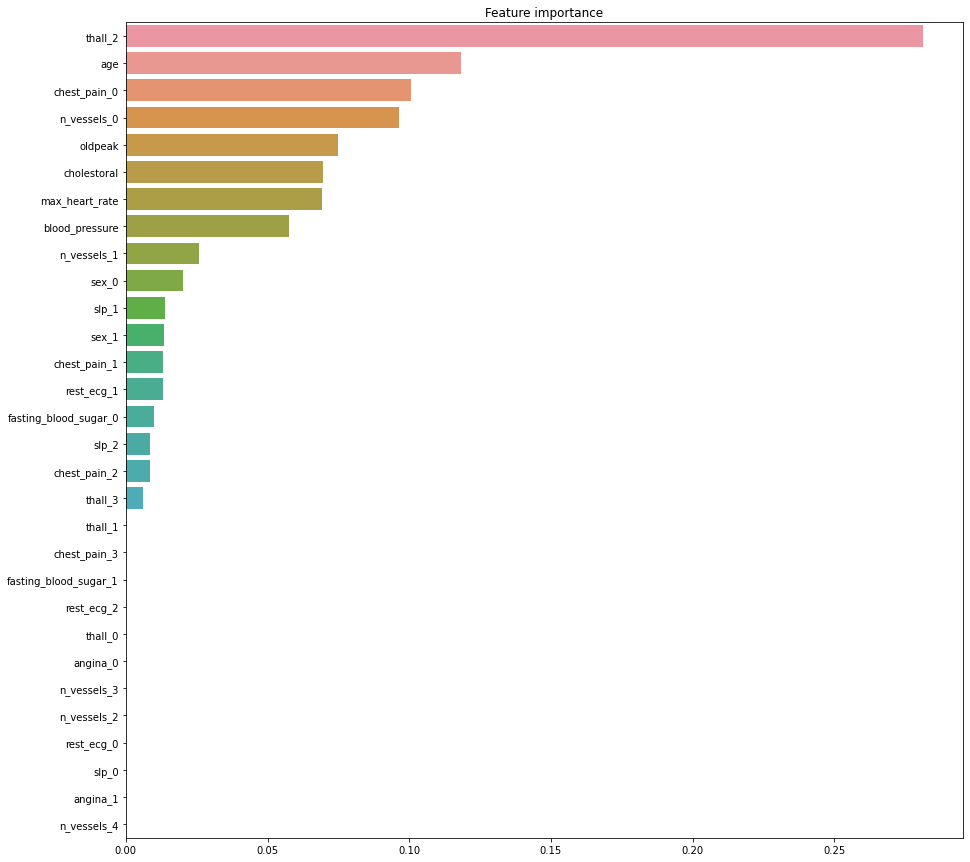

In [ ]:
def plot_feature_importances(model, columns):
    nr_f = 30
    imp = pd.Series(data = model.best_estimator_.feature_importances_,
                    index=columns).sort_values(ascending=False)
    plt.figure(figsize=(15,15))
    plt.title("Feature importance")
    ax = sns.barplot(y=imp.index[:nr_f], x=imp.values[:nr_f], orient='h')

# из исходного датасета взяли dummies и выкинули целевую, получили названия колонок для понимания наилучших признаков
plot_feature_importances(gc_tree, X_train.columns)

### Вывод
Алгоритм случайного леса в данной ситуации по метрике f1_macro занимает среднюю позицию, однако он позволяет получить относительную значимость признаков. Так, на первых трёх местах стоят параметры thall, age и chest_pain, в то время как max_heart_rate занимает лишь 7 место.

f1_macro = 0.84

# 5.Вывод
Наилучшей метрикой f1_macro = 0.90 обладает алгоритм SVC

In [ ]:
X_train, x_test, Y_train, y_test = train_test_split(data.drop(columns='target'),
                                                    data['target'],
                                                    test_size=0.2,
                                                    random_state=42)
scaler = RobustScaler()
scaler.fit(X_train[numbers_cols])

numbers_feature_train = pd.DataFrame(scaler.transform(X_train[numbers_cols]),
                                     columns = numbers_cols)
numbers_feature_test = pd.DataFrame(scaler.transform(x_test[numbers_cols]),
                                    columns = numbers_cols)

ohe = OneHotEncoder(handle_unknown="ignore", sparse=False)
ohe.fit(X_train[categorical_cols])
categorical_features_train = pd.DataFrame(ohe.transform(X_train[categorical_cols]),
                                          columns = ohe.get_feature_names_out(categorical_cols))
categorical_features_test = pd.DataFrame(ohe.transform(x_test[categorical_cols]),
                                         columns = ohe.get_feature_names_out(categorical_cols))

X_train = pd.concat([categorical_features_train, numbers_feature_train], axis=1)
x_test = pd.concat([categorical_features_test, numbers_feature_test], axis=1)


parameters = [{'kernel': ['rbf', 'poly'],
               'degree': [1, 2, 3],
               'gamma': ['scale', 'auto'],
               'C': np.linspace(0.001, 5, 10)}]
gc_svc = GridSearchCV(estimator = SVC(),
                          param_grid = parameters,
                          scoring = 'f1_macro',
                          cv = 7,
                          verbose=0,
                          n_jobs=-1)
gc_svc.fit(X_train, Y_train)
y_pred = gc_svc.predict(x_test)

/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
print(gc_svc.best_params_, '\n')
print(metrics.classification_report(y_test, y_pred))

{'C': 1.1118888888888887, 'degree': 1, 'gamma': 'scale', 'kernel': 'rbf'} 

              precision    recall  f1-score   support

           0       0.87      0.93      0.90        29
           1       0.93      0.88      0.90        32

    accuracy                           0.90        61
   macro avg       0.90      0.90      0.90        61
weighted avg       0.90      0.90      0.90        61

